### Load packages

In [218]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import random

## Load data

In [219]:
df = pd.read_csv("credit_risk_dataset.csv")

## Variable names and descriptions

- person_age: Age of the individual applying for the loan.
- person_income: Annual income of the individual.
- person_home_ownership: Type of home ownership of the individual.
- rent: The individual is currently renting a property.
- mortgage: The individual has a mortgage on the property they own.
- own: The individual owns their home outright.
- other: Other categories of home ownership that may be specific to the dataset.
- person_emp_length: Employment length of the individual in years.
- loan_intent: The intent behind the loan application.
- loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
  - A: The borrower has a high creditworthiness, indicating low risk.
  - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
  - C: The borrower's creditworthiness is moderate.
  - D: The borrower is considered to have higher risk compared to previous grades.
  - E: The borrower's creditworthiness is lower, indicating a higher risk.
  - F: The borrower poses a significant credit risk.
  - G: The borrower's creditworthiness is the lowest, signifying the highest risk.
- loan_amnt: The loan amount requested by the individual.
- loan_int_rate: The interest rate associated with the loan.
- loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
  - 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
  - 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
- loan_percent_income: The percentage of income represented by the loan amount.
- cb_person_default_on_file: Historical default of the individual as per credit bureau records.
  - Y: The individual has a history of defaults on their credit file.
  - N: The individual does not have any history of defaults.
- cb_preson_cred_hist_length: The length of credit history for the individual.

## Basic data information

In [220]:
df.shape

(32581, 12)

In [221]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [223]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [224]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [225]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

## Data exploration

### Numerical variables

In [226]:
n_vars = [x for x in df.columns.to_list() if df[x].dtype == "int64" or df[x].dtype == "float64"]

#### Box plot

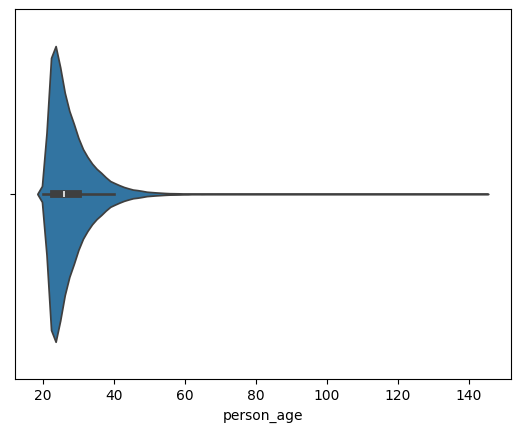

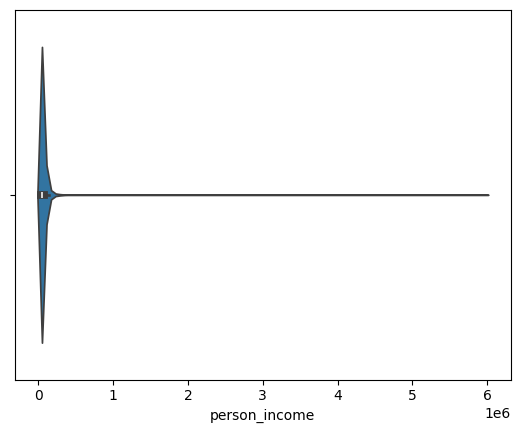

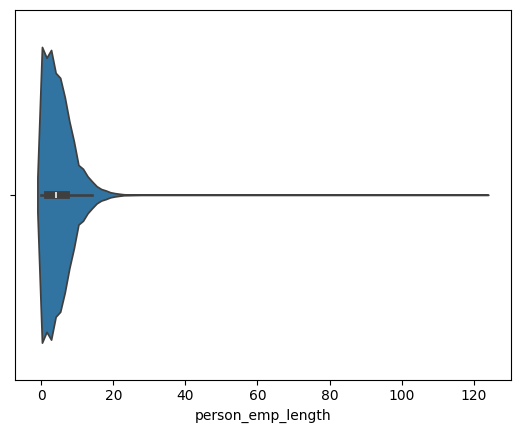

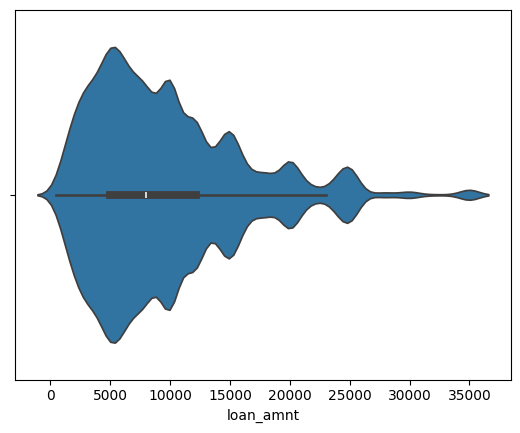

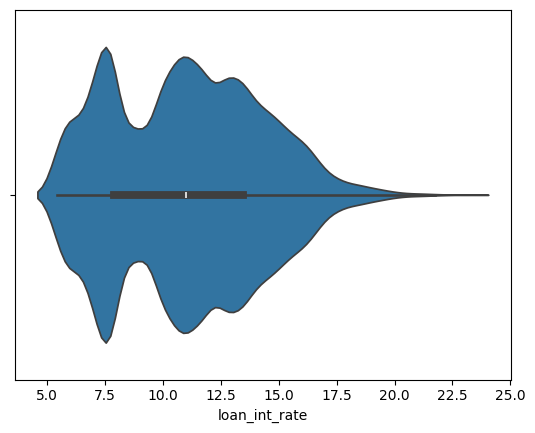

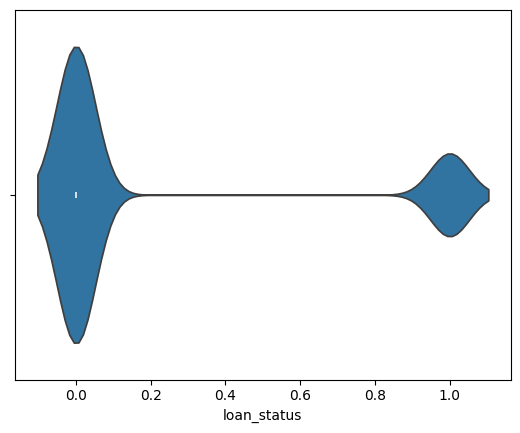

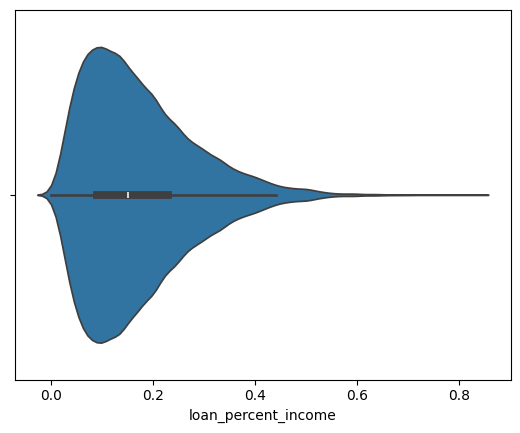

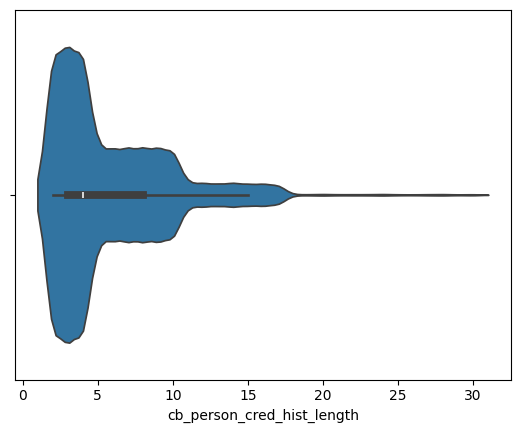

In [227]:
for col in n_vars:
    fig, ax = plt.subplots()
    sns.violinplot(df, x = col, ax = ax)

#### hist plot

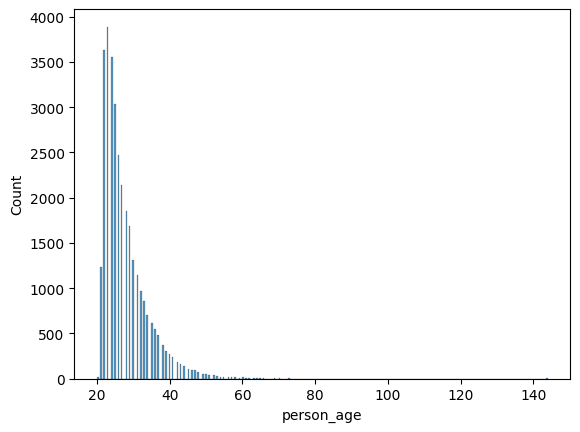

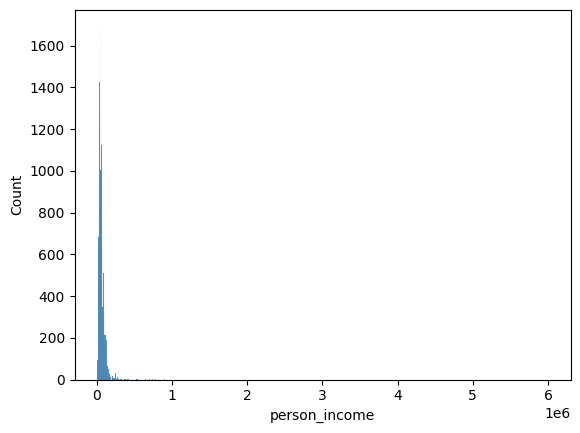

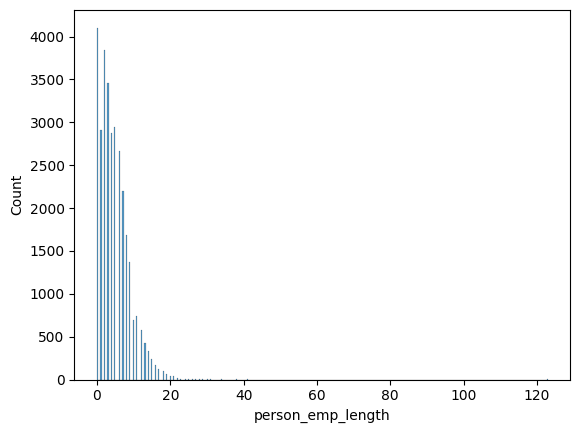

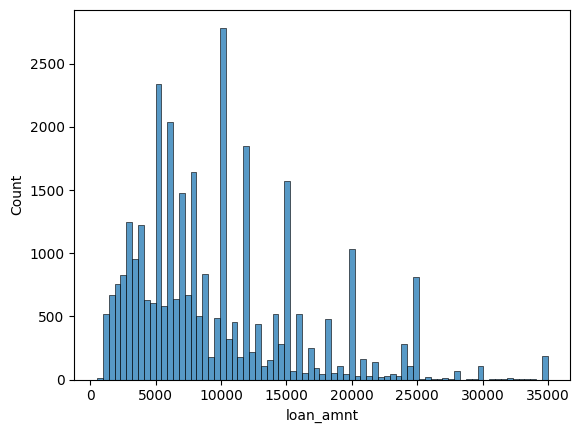

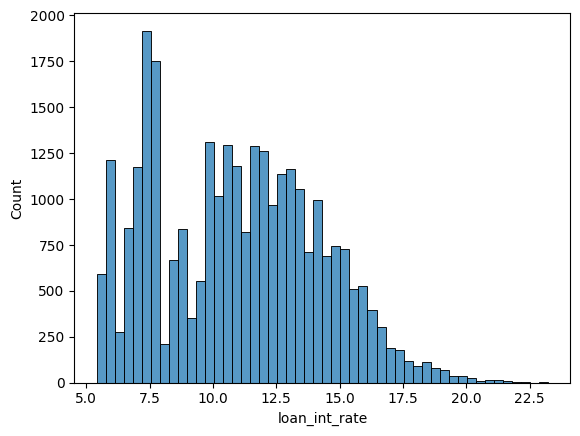

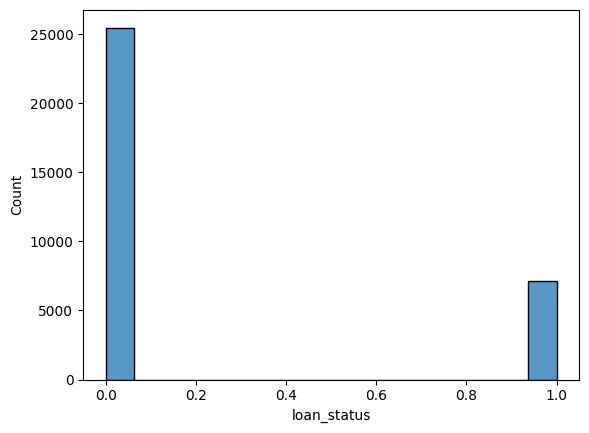

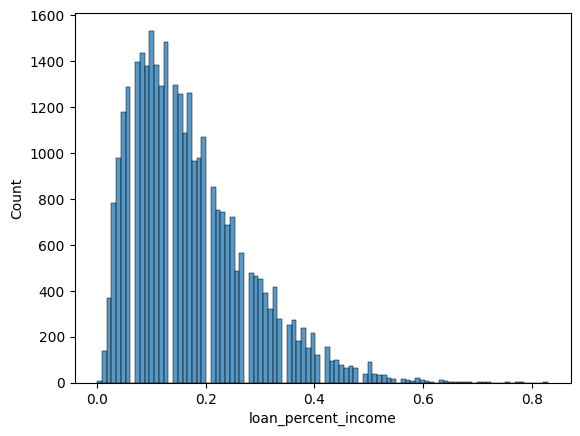

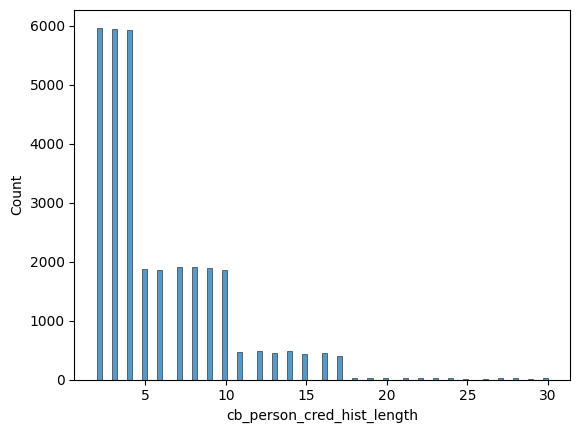

In [228]:
for col in n_vars:
    fig, ax = plt.subplots()
    sns.histplot(df, x = col, ax =ax)

#### loan_percent_income

718 31863


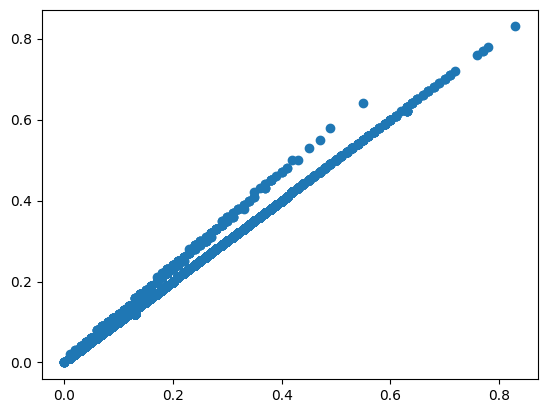

In [229]:
#We have loan_amount and person_income. Lets reconstruct the loan_percent_income variable to check for accuracy

df["loan_percent_income_new"] = df["loan_amnt"]/df["person_income"]

#it appears if they rounded ip, so lets do the same to compare
df["loan_percent_income_new"] = df["loan_percent_income_new"].apply(lambda x: round(x, 2))

plt.scatter(df["loan_percent_income"], df["loan_percent_income_new"])

#The majority of cases are equal but some are not. We cannot comfirm if this is intnetional or not.
#Lets overwrite the column with the recomputed values as we cannot comfirm with experts. 
print(len(df[df["loan_percent_income_new"]!=df["loan_percent_income"]]), len(df[df["loan_percent_income_new"]==df["loan_percent_income"]]))

df["loan_percent_income"] = df["loan_percent_income_new"]  

### Categorical variables

In [230]:
c_vars = [x for x in df.columns.to_list() if df[x].dtype == "object"]

#### Countplot

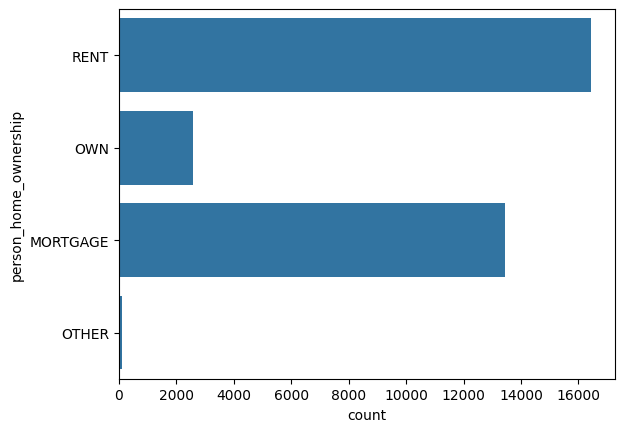

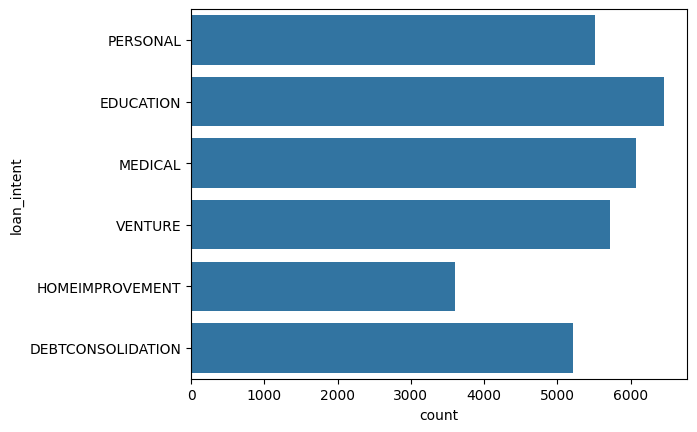

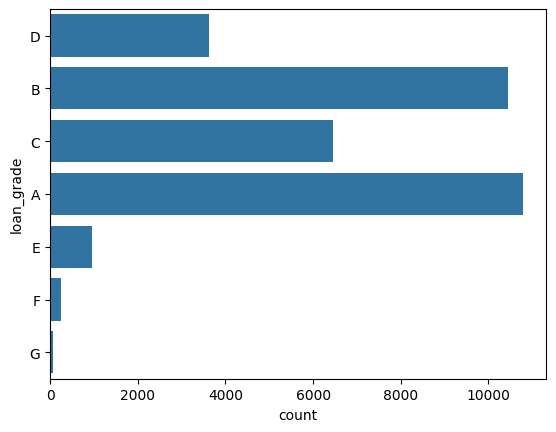

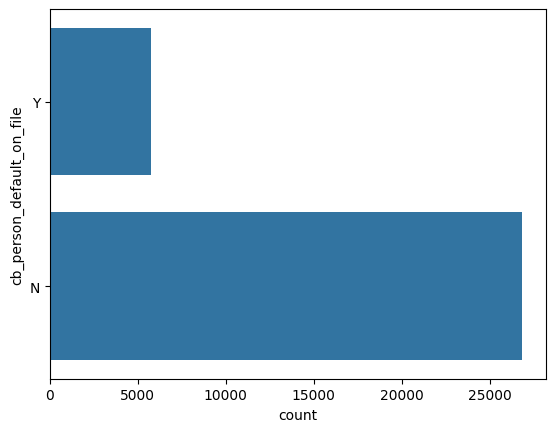

In [231]:
for col in c_vars:
    fig, ax = plt.subplots()
    sns.countplot(df[col], ax = ax)

## Data treatment

In [232]:
df_clean = df.copy()

### person_age

In [233]:
df_clean[df_clean["person_age"]>80]

#Clearly there are some incorrect fields here with person age > 100 years. We will remove these rows
#Note, for IRB modelling, this would require more investigation as one cannot simply remove data without
#strong justification

df_clean = df_clean[df_clean["person_age"]<100]

### person_emp_length

In [234]:
df_clean[df_clean["person_emp_length"]>df_clean["person_age"]]

#We notice there are some invalid values for age/employment length. We will remove these rows.
#We remove cases where emp_length is greater than person_age

#we need to be careful how we do it, because person_emp_length contains missing values and we 
#dont want to lose the rows with missing values for person_emp_length
df_clean = df_clean[(df_clean["person_emp_length"].isnull()) | 
                    (df_clean["person_emp_length"] < df_clean["person_age"])]

### cb_person_cred_hist_length

In [235]:
df_clean[df_clean["cb_person_cred_hist_length"]>df_clean["person_age"]]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_percent_income_new


In [236]:
df_clean[df_clean["cb_person_cred_hist_length"]>80]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_percent_income_new


### person_income

In [237]:
#from histogram, we see person_income has some large values. Lets investigate further.
df_clean[df_clean["person_income"]>1000000]

#We have some largue annual incomes greater than 1m, with a small loan amount. This
#is unlikely. We would need to comfirm this with stakeholders to check the reliability 
#of this information but we can't. Therefore, I will assume they are correct.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_percent_income_new
17833,32,1200000,MORTGAGE,1.0,VENTURE,A,12000,7.51,0,0.01,N,8,0.01
29119,36,1200000,OWN,16.0,MEDICAL,A,10000,6.54,0,0.01,N,11,0.01
29120,40,1200000,MORTGAGE,1.0,MEDICAL,A,10000,NaN,0,0.01,N,16,0.01
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.00,Y,15,0.00
31922,47,1362000,MORTGAGE,9.0,VENTURE,A,6600,7.74,0,0.00,N,17,0.00
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.40,0,0.00,N,15,0.00
32497,63,1782000,RENT,13.0,EDUCATION,C,12025,14.27,0,0.01,N,30,0.01
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,NaN,0,0.00,N,21,0.00


### missing values

In [238]:
df_clean.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_percent_income_new          0
dtype: int64

In [239]:
#Starting with person_emp_length
df_clean[df_clean["person_emp_length"].isnull()].head()

#Missing values appear valid and therefore require treatment. We must choose imputation method
#carefully since if we choose the median, we may have cases where the person_age is greater median person_emp_length

#Lets try median based on buckets of person_age for a more accurate imputation
df_clean["person_age_bucket"] = pd.cut(df_clean["person_age"], bins = [0, 30, 40, 50, 60, 70, 100])

#Number of observations per bucket to see if appropriate for computing median
print(df_clean["person_age_bucket"].value_counts())

#better to merge bucket 60-70 with 70-100 based on number of observations
df_clean["person_age_bucket"] = pd.cut(df_clean["person_age"], bins = [0, 30, 40, 50, 60, 100])

median_values = df_clean.groupby("person_age_bucket")["person_emp_length"].median()

print(median_values)

#compare with median of entire column
print(df_clean["person_emp_length"].median())

#It turns out both methods lead to the same result (apart from final bucket). The median will always be less than person_age as min age is 20.
#Therefore, we can impute missing values with median of entire column, but it is good we checked.
df_clean["person_emp_length"] = df_clean["person_emp_length"].fillna(df_clean["person_emp_length"].median())

df_clean = df_clean.drop(columns = ["person_age_bucket"])

person_age_bucket
(0, 30]      24822
(30, 40]      6263
(40, 50]      1206
(50, 60]       218
(60, 70]        57
(70, 100]        8
Name: count, dtype: int64
person_age_bucket
(0, 30]      4.0
(30, 40]     4.0
(40, 50]     4.0
(50, 60]     4.0
(60, 100]    3.0
Name: person_emp_length, dtype: float64
4.0


/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_23470/807403986.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df_clean.groupby("person_age_bucket")["person_emp_length"].median()


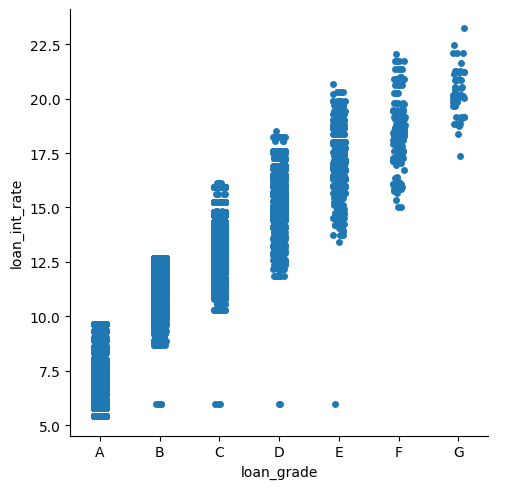

In [240]:
#Now for loan_int_rate
df_clean[df_clean["loan_int_rate"].isnull()].head()

#Missings seem valued and we need to impute.
#Lets see if there is a relationship between loan_grade and loan_int_rate
sns.catplot(data=df_clean, x = "loan_grade", y="loan_int_rate", order = ["A", "B", "C", "D", "E", "F", "G"])

#clearly from plot, each loan grade has a range of interest rates. We can impute missing values based on median of loan_grade.
median_values = df_clean.groupby("loan_grade")["loan_int_rate"].median()

df_clean["loan_int_rate"] = df_clean.apply(
    lambda row: median_values[row["loan_grade"]] if pd.isnull(row["loan_int_rate"]) else row["loan_int_rate"], 
    axis=1
)

## Risk driver construction

In [241]:
df_model = df_clean.copy()

### Categorical drivers

In [242]:
#For each categorical variable, lets make a dummy variable for each category
df_model = pd.get_dummies(df_model, columns = c_vars, dtype=float)

### Numeric drivers

In [243]:
#Lets try a bucket transformation for numerical variables that make sense to be in buckets

bucket_cols = [
    "person_income",
    "loan_amnt",
    "loan_percent_income"
]

for col in bucket_cols:
    df_model[col + "_bucket"] = pd.cut(df_model[col], bins = 10)
    #check size of bucket columns
    print(df_model[col + "_bucket"].value_counts())


person_income_bucket
(1964.216, 207578.4]      32166
(207578.4, 411156.8]        334
(411156.8, 614735.2]         40
(614735.2, 818313.6]         18
(818313.6, 1021892.0]         8
(1021892.0, 1225470.4]        3
(1836205.6, 2039784.0]        2
(1225470.4, 1429048.8]        1
(1429048.8, 1632627.2]        1
(1632627.2, 1836205.6]        1
Name: count, dtype: int64
loan_amnt_bucket
(3950.0, 7400.0]      9456
(7400.0, 10850.0]     7361
(465.5, 3950.0]       5123
(10850.0, 14300.0]    3912
(14300.0, 17750.0]    2863
(17750.0, 21200.0]    1925
(24650.0, 28100.0]     925
(21200.0, 24650.0]     672
(31550.0, 35000.0]     212
(28100.0, 31550.0]     125
Name: count, dtype: int64
loan_percent_income_bucket
(0.083, 0.166]       10705
(-0.00083, 0.083]     7534
(0.166, 0.249]        7293
(0.249, 0.332]        4311
(0.332, 0.415]        1712
(0.415, 0.498]         679
(0.498, 0.581]         259
(0.581, 0.664]          60
(0.664, 0.747]          16
(0.747, 0.83]            5
Name: count, dtype: int

In [244]:
#Clearly we need to make a restriction for the mimunum number of observations per bucket

def create_bins(df, column, desired_bins, min_size):
    """
    Create quantile-based bins for a numerical column in a DataFrame while ensuring 
    each bin has at least `min_size` observations. If a bin has fewer than `min_size` 
    observations, it merges with the adjacent bin. The first bin always starts from 0.

    Parameters
    ----------
    df : pd.DataFrame 
        The input DataFrame.
    column : str
        The name of the numerical column to bin.
    desired_bins : int
        The desired number of bins to create.
    min_size : int
        The minimum number of observations required in each bin.

    Returns
    -------
    tuple (pd.DataFrame, list)
        A tuple containing:
        - DataFrame with a new column `<column>_bucket` representing the bins as integers.
        - A list of bucket splits.
    """
    
    # Step 1: Create the initial quantile-based bins using pd.qcut
    df[f'{column}_bucket'] = pd.qcut(df[column], q=desired_bins, duplicates='drop')
    
    # Step 2: Adjust the first bin to start at 0
    bin_edges = df[f'{column}_bucket'].cat.categories
    new_edges = [(0, bin_edges[0].right)] + [(bin_edges[i].left, bin_edges[i].right) for i in range(1, len(bin_edges))]
    
    # Step 3: Create new bin intervals
    new_bins = [pd.Interval(left, right, closed='right') for left, right in new_edges]

    # Step 4: Apply the adjusted bins
    df[f'{column}_bucket'] = pd.cut(df[column], bins=new_bins, include_lowest=True)

    # Step 5: Merge bins if count is below min_size
    bin_counts = df[f'{column}_bucket'].value_counts().sort_index()

    while any(bin_counts < min_size):
        small_bin = bin_counts[bin_counts < min_size].index[0]
        idx = list(bin_counts.index).index(small_bin)

        # Merge bins
        if idx > 0:
            new_bin = pd.Interval(left=bin_counts.index[idx-1].left, right=bin_counts.index[idx].right, closed='right')
            new_bins[idx-1] = new_bin
            del new_bins[idx]
        else:
            new_bin = pd.Interval(left=bin_counts.index[idx].left, right=bin_counts.index[idx+1].right, closed='right')
            new_bins[idx] = new_bin
            del new_bins[idx+1]

        # Reapply bins
        df[f'{column}_bucket'] = pd.cut(df[column], bins=new_bins, include_lowest=True)
        bin_counts = df[f'{column}_bucket'].value_counts().sort_index()

    # Convert bucket intervals to ordered integer labels
    bin_mapping = {interval: idx for idx, interval in enumerate(new_bins)}
    df[f'{column}_bucket'] = df[f'{column}_bucket'].map(bin_mapping)

    # Extract final bucket edges
    final_bucket_splits = [interval.right for interval in new_bins]

    return df, final_bucket_splits

#Lets try 100
final_bucket_splits = {}
for col in bucket_cols:
    df_model, split = create_bins(df_model, col, 10, 100)
    final_bucket_splits[col] = split
    #check size of bucket columns
    print(df_model[col + "_bucket"].value_counts())


person_income_bucket
2    3532
1    3372
7    3259
0    3258
6    3254
9    3253
8    3236
4    3207
5    3189
3    3014
Name: count, dtype: int64
loan_amnt_bucket
5    4724
0    3982
4    3769
3    3254
9    3251
8    3238
2    3236
6    2882
1    2561
7    1677
Name: count, dtype: int64
loan_percent_income_bucket
1    4096
4    3747
0    3430
5    3307
8    3160
9    3155
3    2950
2    2920
7    2914
6    2887
Name: count, dtype: int64


## Model development

### Train / Test split

In [245]:
#We need a split of 80/20, but we want to ensure it is balanced based on the target variable "loan_status"

#We can do this with a function, which searches for train and test splits that are balanced

def train_test_split_balanced(df, target_col, diff_threshold=0.01, test_size=0.2, random_state=None):
    """
    Split the DataFrame into train and test sets while ensuring that the difference in the mean of the target variable
    between the train and test sets is below a given threshold. The split is performed repeatedly if the difference 
    exceeds the threshold, using different random states.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame to split.
    target_col : str
        The name of the target column to balance.
    diff_threshold : float, optional, default=0.01
        The maximum allowed absolute difference in the mean of the target column between the train and test sets.
    test_size : float, optional, default=0.2
        The proportion of the data to include in the test set (between 0.0 and 1.0).
    random_state : int, optional, default=None
        The seed used by the random number generator for reproducibility. If None, a random seed will be chosen.

    Returns
    -------
    train : pandas.DataFrame
        The training set with balanced target variable distribution.
    test : pandas.DataFrame
        The test set with balanced target variable distribution.
    """
    
    # If no random_state is provided, generate one
    if random_state is None:
        random_state = random.randint(1, 10000000)

    # Step 1: Make a train, test split based on the random seed
    train, test = train_test_split(df, test_size=test_size, random_state=random_state)

    # Step 2: Compute the average of the target column for train and test sets
    train_target = train[target_col].mean()
    test_target = test[target_col].mean()

    # Step 3: Check if the absolute difference in target means is within the acceptable threshold
    while abs(train_target - test_target) > diff_threshold:
        print(f"Random state {random_state} has abs difference of {abs(train_target - test_target):.4f}", " which is greater than threshold of ", diff_threshold, ". Searching for new random state.")  
        # Generate a new random state if the difference exceeds the threshold
        random_state = random.randint(1, 10000000)
        train, test = train_test_split(df, test_size=test_size, random_state=random_state)
        train_target = train[target_col].mean()
        test_target = test[target_col].mean()

    print(f"Random state {random_state} has abs difference of {abs(train_target - test_target):.4f}. Search complete.")

    return train, test

train, test = train_test_split_balanced(df_model, "loan_status", diff_threshold = 0.001, test_size = 0.2, random_state = None)
    

Random state 1668416 has abs difference of 0.0034  which is greater than threshold of  0.001 . Searching for new random state.
Random state 4284024 has abs difference of 0.0049  which is greater than threshold of  0.001 . Searching for new random state.
Random state 172441 has abs difference of 0.0095  which is greater than threshold of  0.001 . Searching for new random state.
Random state 6563610 has abs difference of 0.0024  which is greater than threshold of  0.001 . Searching for new random state.
Random state 1331290 has abs difference of 0.0012  which is greater than threshold of  0.001 . Searching for new random state.
Random state 8090710 has abs difference of 0.0005. Search complete.


In [246]:
riskdriver_num_columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length',
    'loan_percent_income_new']

riskdriver_cat_columns = [
    'person_home_ownership_MORTGAGE',
    'person_home_ownership_OTHER',
    'person_home_ownership_OWN',
    'person_home_ownership_RENT',
    'loan_intent_DEBTCONSOLIDATION',
    'loan_intent_EDUCATION',
    'loan_intent_HOMEIMPROVEMENT',
    'loan_intent_MEDICAL',
    'loan_intent_PERSONAL',
    'loan_intent_VENTURE',
    'loan_grade_A',
    'loan_grade_B',
    'loan_grade_C',
    'loan_grade_D',
    'loan_grade_E',
    'loan_grade_F',
    'loan_grade_G',
    'cb_person_default_on_file_N',
    'cb_person_default_on_file_Y',
    'person_income_bucket',
    'loan_amnt_bucket',
    'loan_percent_income_bucket']   

target_column = ["loan_status"]

### Bivariate analysis

#### Visualise relationship between each driver and target variable

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_23470/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


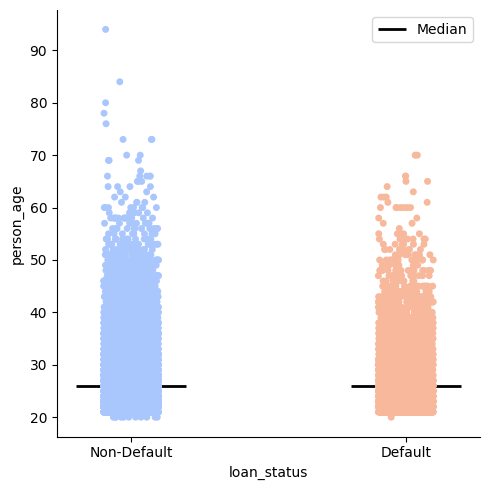

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_23470/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


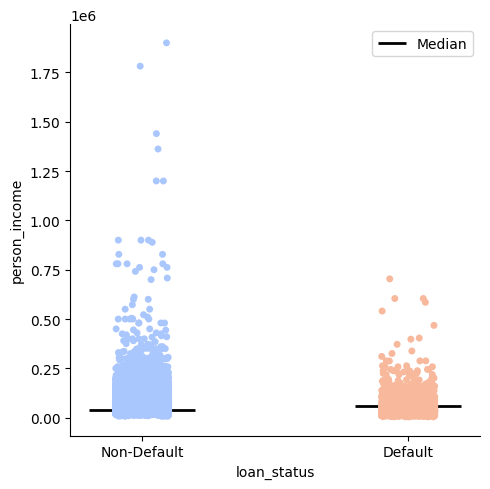

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_23470/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


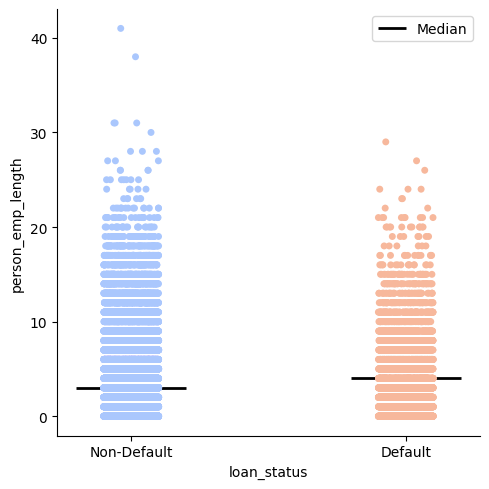

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_23470/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


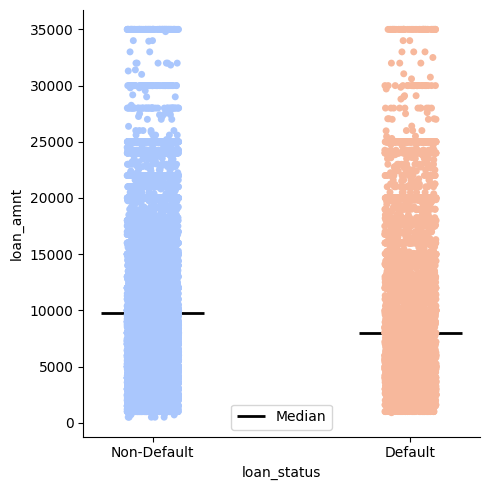

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_23470/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


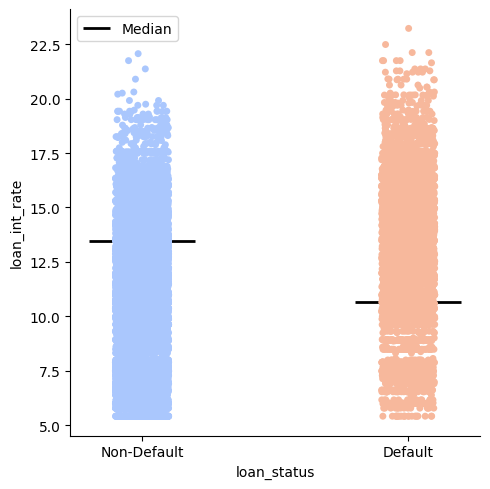

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_23470/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


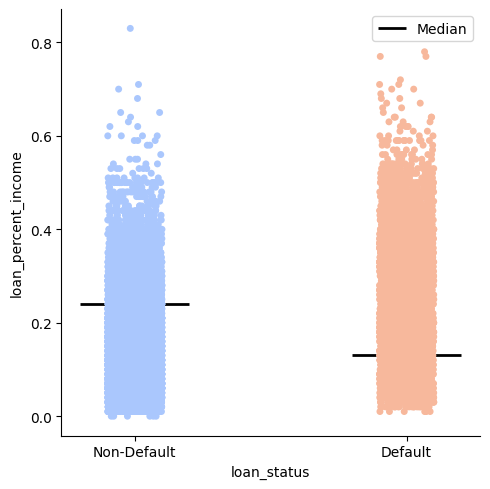

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_23470/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


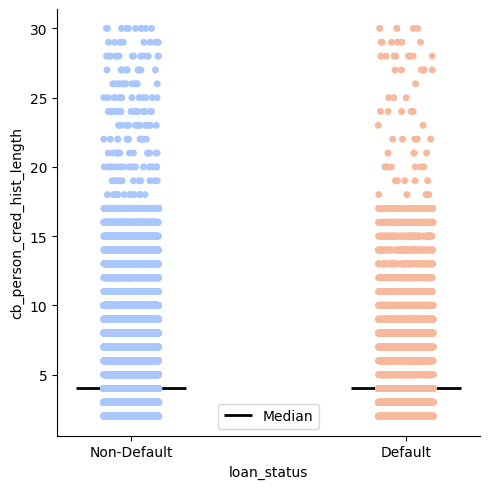

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_23470/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


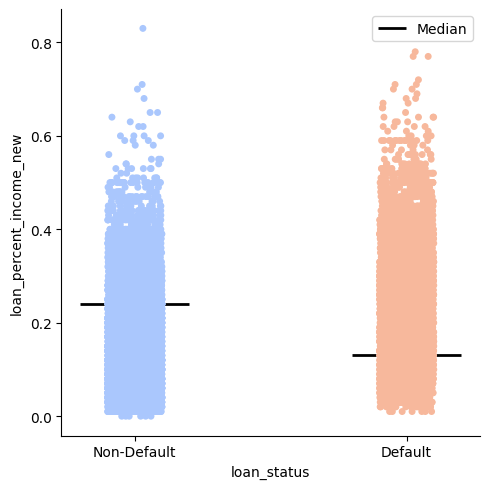

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_23470/1618934958.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


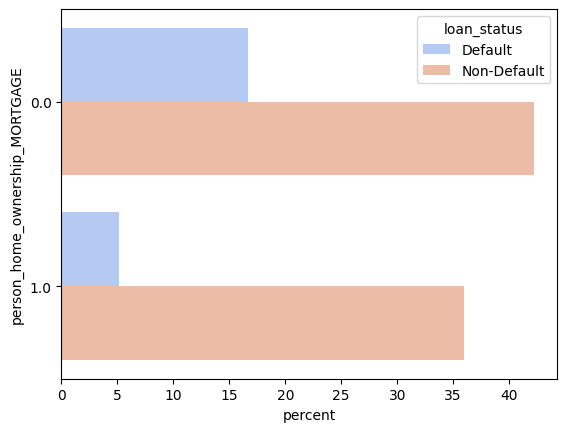

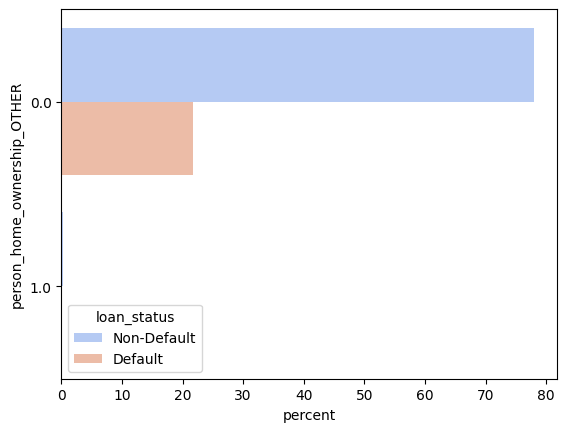

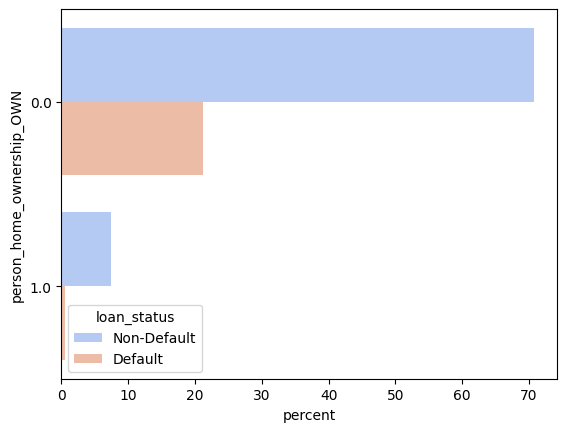

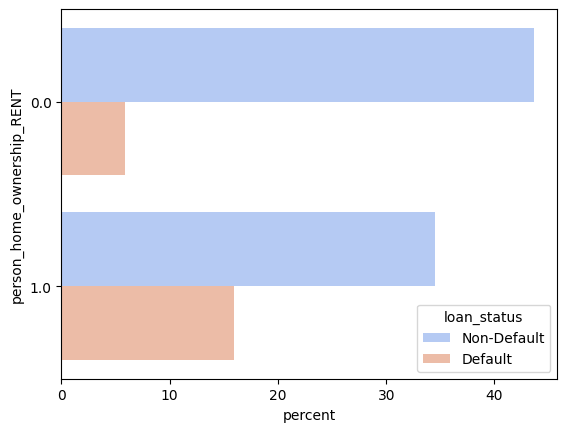

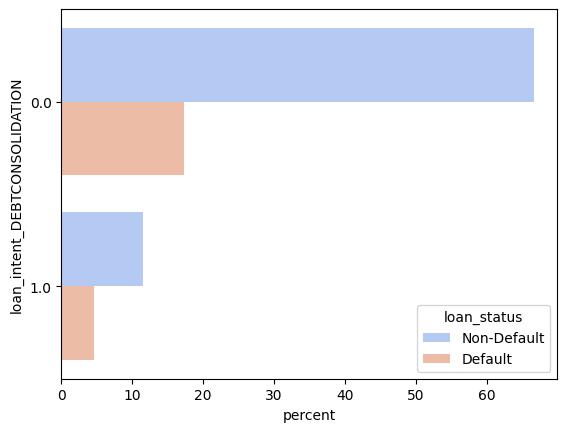

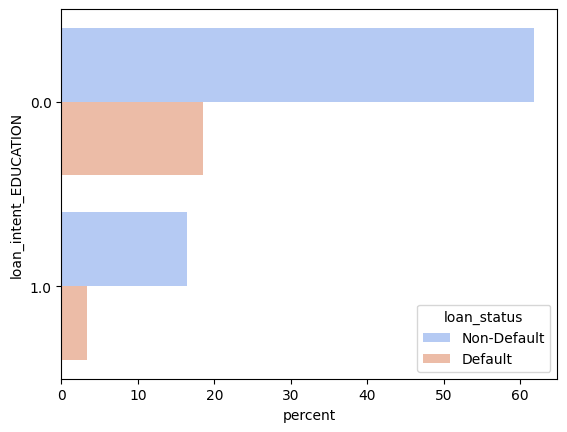

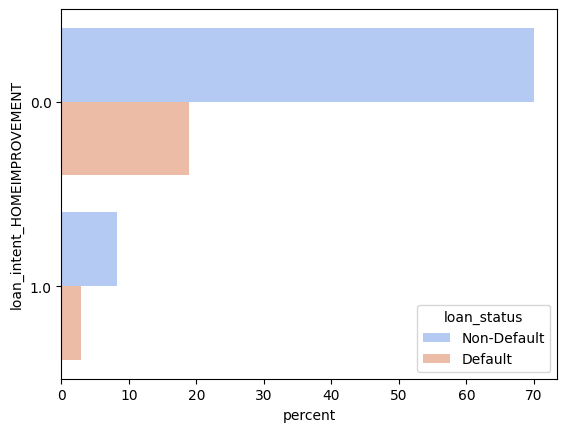

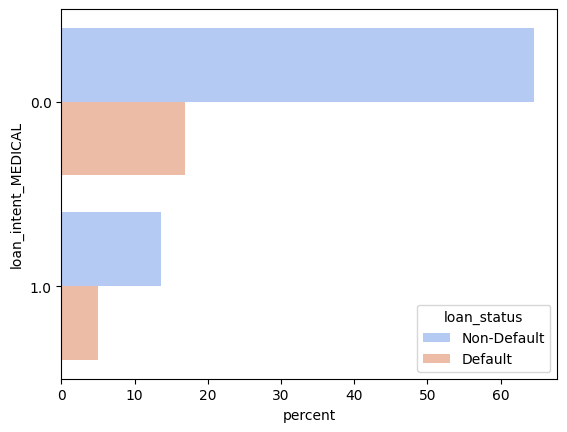

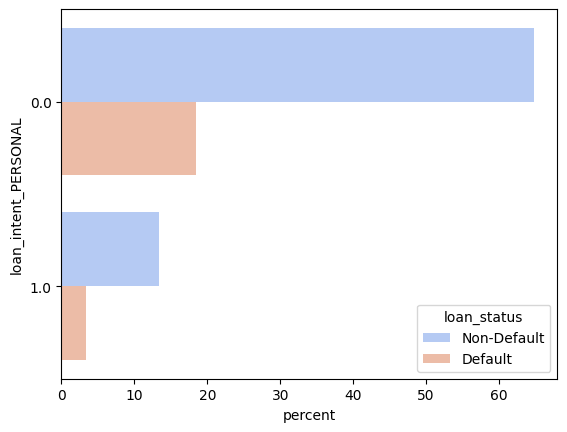

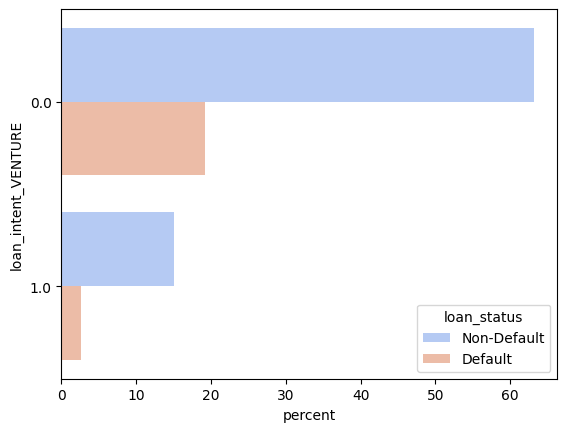

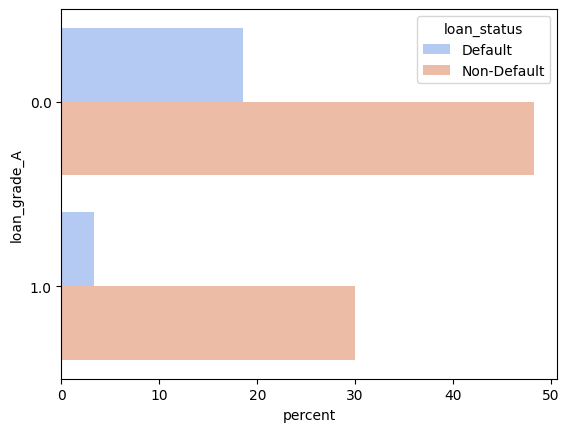

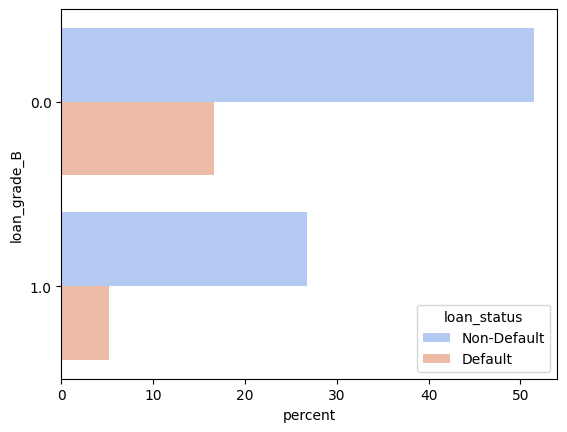

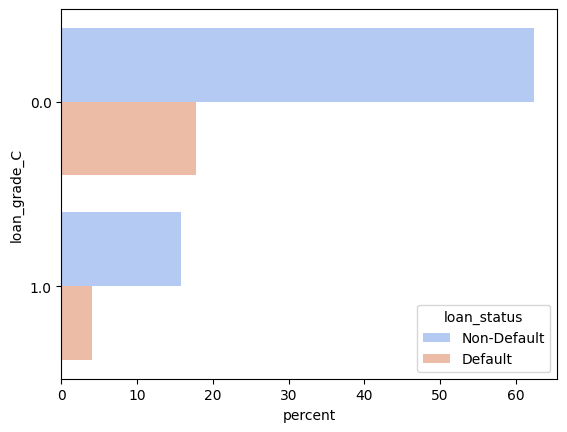

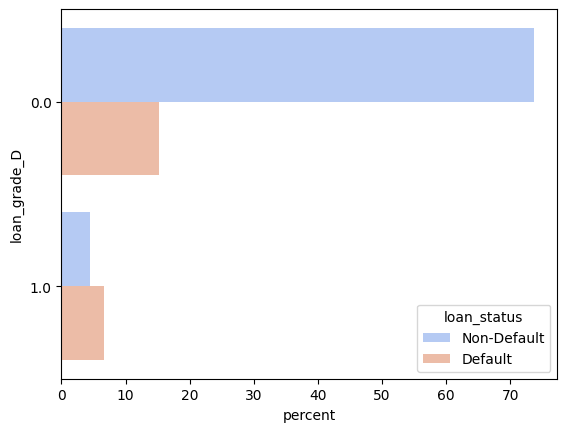

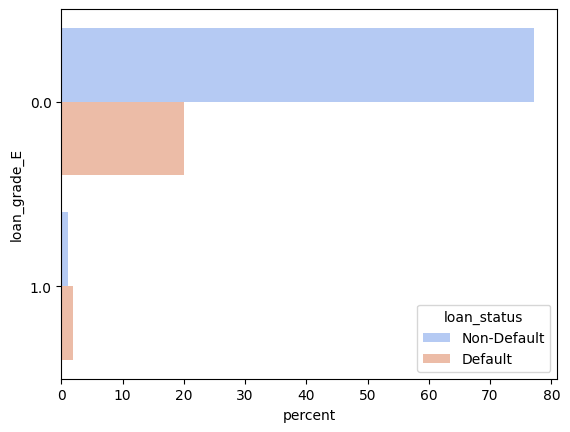

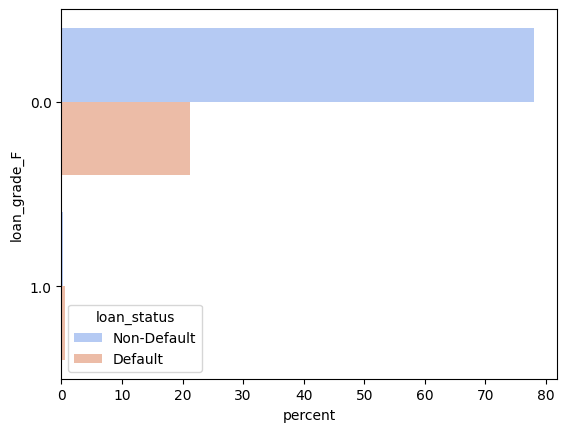

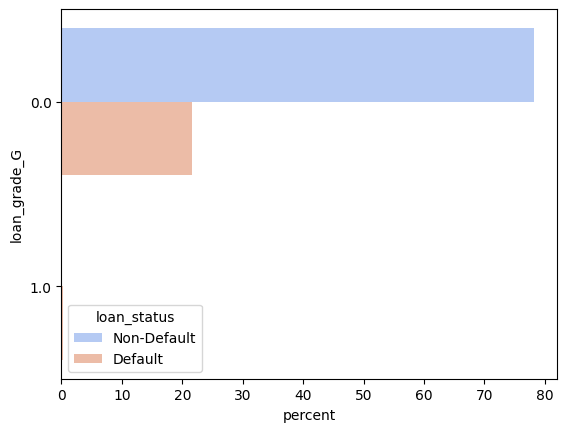

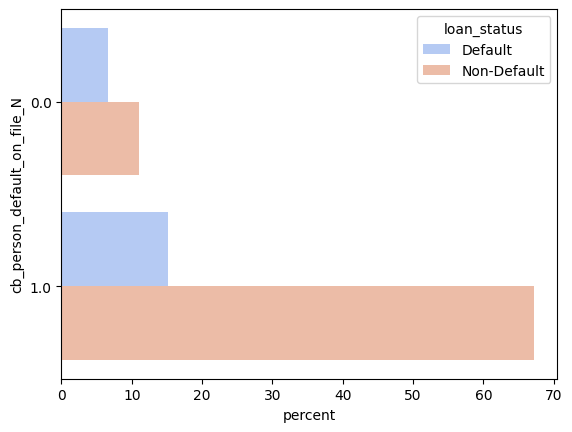

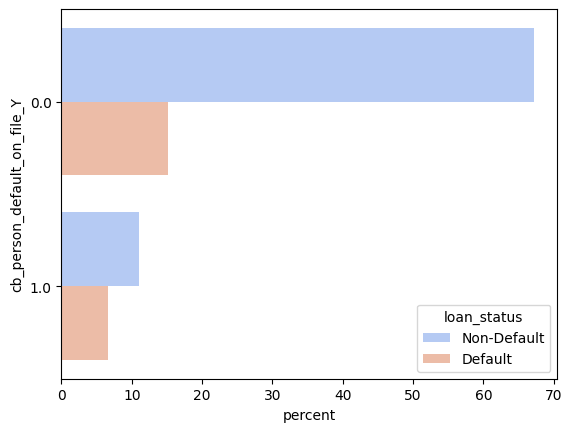

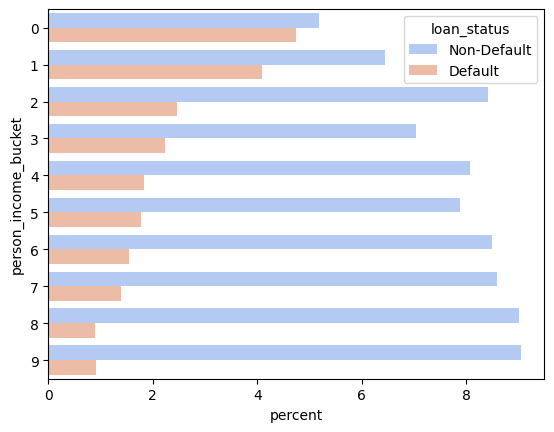

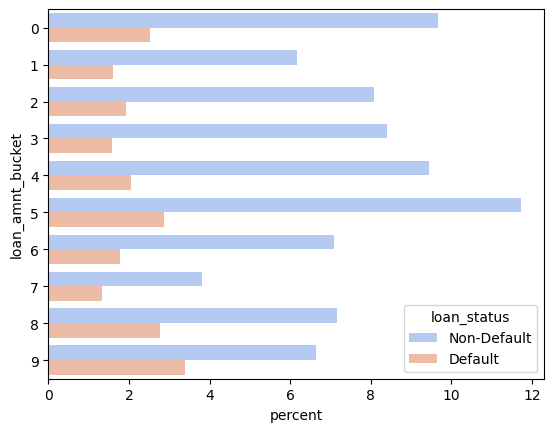

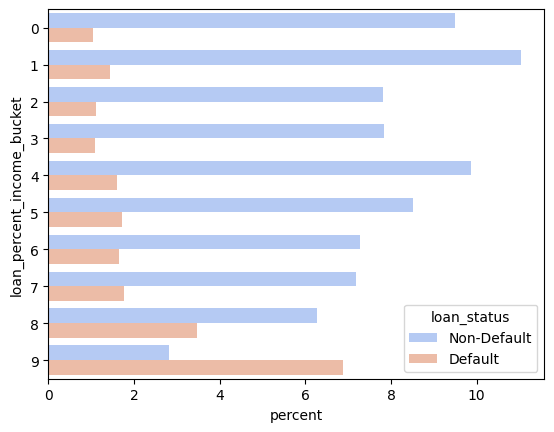

In [247]:
train_plot = train.copy()
train_plot["loan_status"] = train_plot["loan_status"].apply(lambda x: "Default" if x == 1 else "Non-Default")

# Plot the numerical columns
for col in riskdriver_num_columns:
    # Create the catplot
    g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")

    # Get the median values for each category
    medians = train_plot.groupby("loan_status")[col].median()

    # Add horizontal median markers
    ax = g.ax
    for i, category in enumerate(medians.index):
        ax.hlines(y=medians[category], xmin=i - 0.2, xmax=i + 0.2, color="black", linewidth=2, label="Median" if i == 0 else "")

    plt.legend()
    plt.show()

    # Plot the numerical columns
for col in riskdriver_cat_columns:

    fig, ax = plt.subplots()
    # Create the catplot
    sns.countplot(data=train_plot, y=col, hue="loan_status", palette="coolwarm", ax = ax, stat="percent")


#### Correlation between variable and target

In [248]:
corr_dict = {}
for col in riskdriver_cat_columns + riskdriver_num_columns:
    corr_dict[col] = np.round(train[col].corr(train["loan_status"]), 3)

sorted_dict_asc = dict(sorted(corr_dict.items(), key=lambda item: item[1]))
print(sorted_dict_asc)

{'person_income_bucket': np.float64(-0.264), 'loan_grade_A': np.float64(-0.202), 'person_home_ownership_MORTGAGE': np.float64(-0.188), 'cb_person_default_on_file_N': np.float64(-0.179), 'person_income': np.float64(-0.171), 'person_home_ownership_OWN': np.float64(-0.103), 'loan_grade_B': np.float64(-0.093), 'person_emp_length': np.float64(-0.087), 'loan_intent_VENTURE': np.float64(-0.079), 'loan_intent_EDUCATION': np.float64(-0.06), 'loan_intent_PERSONAL': np.float64(-0.02), 'person_age': np.float64(-0.019), 'loan_grade_C': np.float64(-0.016), 'cb_person_cred_hist_length': np.float64(-0.013), 'person_home_ownership_OTHER': np.float64(0.016), 'loan_intent_HOMEIMPROVEMENT': np.float64(0.041), 'loan_intent_MEDICAL': np.float64(0.058), 'loan_intent_DEBTCONSOLIDATION': np.float64(0.07), 'loan_grade_G': np.float64(0.084), 'loan_amnt_bucket': np.float64(0.088), 'loan_amnt': np.float64(0.107), 'loan_grade_F': np.float64(0.11), 'loan_grade_E': np.float64(0.178), 'cb_person_default_on_file_Y': np

#### Gini coefficient between variable and target

#### Logistic Regression: Mathematics & Explanation

#### 1. What is Logistic Regression?

Logistic regression is a statistical model used for binary classification (i.e., when the target variable is 0 or 1). Instead of predicting a continuous value like in linear regression, it predicts a probability that an observation belongs to class 1.

#### 2. Mathematical Formulation

Logistic regression models the probability that a given input $x$ belongs to class 1 using the sigmoid function:

$$
P(Y = 1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n)}}
$$

Where:
- $P(Y = 1 | X)$ is the predicted probability of the target being 1.
- $\beta_0$ is the intercept (bias term).
- $\beta_1, \beta_2, \dots, \beta_n$ are the coefficients (weights) for the predictors $X_1, X_2, \dots, X_n$.
- $e$ is the mathematical constant (Euler’s number, ~2.718).

#### 3. Why Use the Sigmoid Function?

The sigmoid function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

maps any real number $z$ to a value between 0 and 1, making it suitable for probability predictions.

---

#### Deriving Logistic Regression Coefficients

To estimate $\beta_0, \beta_1, \dots, \beta_n$, we use **Maximum Likelihood Estimation (MLE)**.

For a dataset with $m$ observations, define:

$$
L(\beta) = \prod_{i=1}^{m} P(y_i | X_i) = \prod_{i=1}^{m} \left( \frac{1}{1 + e^{-X_i^T \beta}} \right)^{y_i} \left( 1 - \frac{1}{1 + e^{-X_i^T \beta}} \right)^{(1 - y_i)}
$$

Taking the log-likelihood function:

$$
\log L(\beta) = \sum_{i=1}^{m} \left[ y_i \log P(y_i | X_i) + (1 - y_i) \log(1 - P(y_i | X_i)) \right]
$$

To find the best coefficients $\beta$, we maximize $\log L(\beta)$ using optimization techniques like gradient descent or Newton’s method.

---

#### Gini Coefficient & ROC AUC

The **Gini coefficient** measures how well the logistic regression model separates the two classes (0 and 1).

#### 1. ROC Curve & AUC
- The **Receiver Operating Characteristic (ROC)** curve plots **True Positive Rate (TPR)** vs. **False Positive Rate (FPR)** at different probability thresholds.
- The **Area Under the Curve (AUC)** quantifies the ability of the model to distinguish between classes.

#### 2. Gini Coefficient Formula

The **Gini coefficient** is derived from **AUC**:

$$
G = 2 \times \text{AUC} - 1
$$

- If $G = 1$, the model perfectly distinguishes between 0 and 1.
- If $G = 0$, the model is no better than random guessing.
- If $G < 0$, the model performs worse than random guessing.

---

#### Simple Explanation in Words
1. Logistic Regression transforms a linear combination of inputs into a probability using the sigmoid function.
2. It estimates the best-fitting coefficients using maximum likelihood estimation.
3. The Gini Coefficient measures how well the model differentiates between classes, derived from the AUC of the ROC curve.

In [249]:
def compute_gini_per_risk_driver(df, risk_drivers, target):
    """
    Compute the Gini coefficient for each risk driver in relation to a binary target variable 
    using logistic regression.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing risk drivers and the target variable.
    risk_drivers : list
        List of column names representing risk drivers.
    target : str
        The target variable column name (binary).

    Returns:
    -------
    pd.DataFrame
        A DataFrame showing the Gini coefficient per risk driver, sorted from highest to lowest.
    """
    results = []

    for driver in risk_drivers:
        # Remove NaNs for valid model training
        temp_df = df[[driver, target]].dropna()

        X = temp_df[[driver]]  # Predictor (single risk driver)
        y = temp_df[target]  # Binary target variable

        model = LogisticRegression(solver='liblinear')
        model.fit(X, y)

        # Predict probabilities
        y_pred_prob = model.predict_proba(X)[:, 1]

        # Compute ROC AUC and Gini coefficient
        auc = roc_auc_score(y, y_pred_prob)
        gini = 2 * auc - 1

        results.append({'Risk Driver': driver, 'Gini Coefficient': gini})

    # Convert results to a DataFrame and sort from highest Gini to lowest
    gini_df = pd.DataFrame(results).sort_values(by="Gini Coefficient", ascending=False)

    return gini_df

bivariate_gini = compute_gini_per_risk_driver(train, riskdriver_cat_columns + riskdriver_num_columns, target_column[0])
bivariate_gini

,Risk Driver,Gini Coefficient
29,loan_percent_income_new,0.451474
27,loan_percent_income,0.451474
21,loan_percent_income_bucket,0.446642
26,loan_int_rate,0.446314
23,person_income,0.378541
19,person_income_bucket,0.368428
3,person_home_ownership_RENT,0.289862
13,loan_grade_D,0.245259
10,loan_grade_A,0.230295
0,person_home_ownership_MORTGAGE,0.224004


#### Remove risk drivers with Gini < 0.05 threshold as they have little predictive power

In [250]:
bivariate_gini[bivariate_gini["Gini Coefficient"]>=0.05]

riskdriver_cat_columns = [c for c in riskdriver_cat_columns if c in bivariate_gini[bivariate_gini["Gini Coefficient"]>=0.05]["Risk Driver"].to_list()]
riskdriver_num_columns = [c for c in riskdriver_num_columns if c in bivariate_gini[bivariate_gini["Gini Coefficient"]>=0.05]["Risk Driver"].to_list()]

### Correlation

<Axes: >

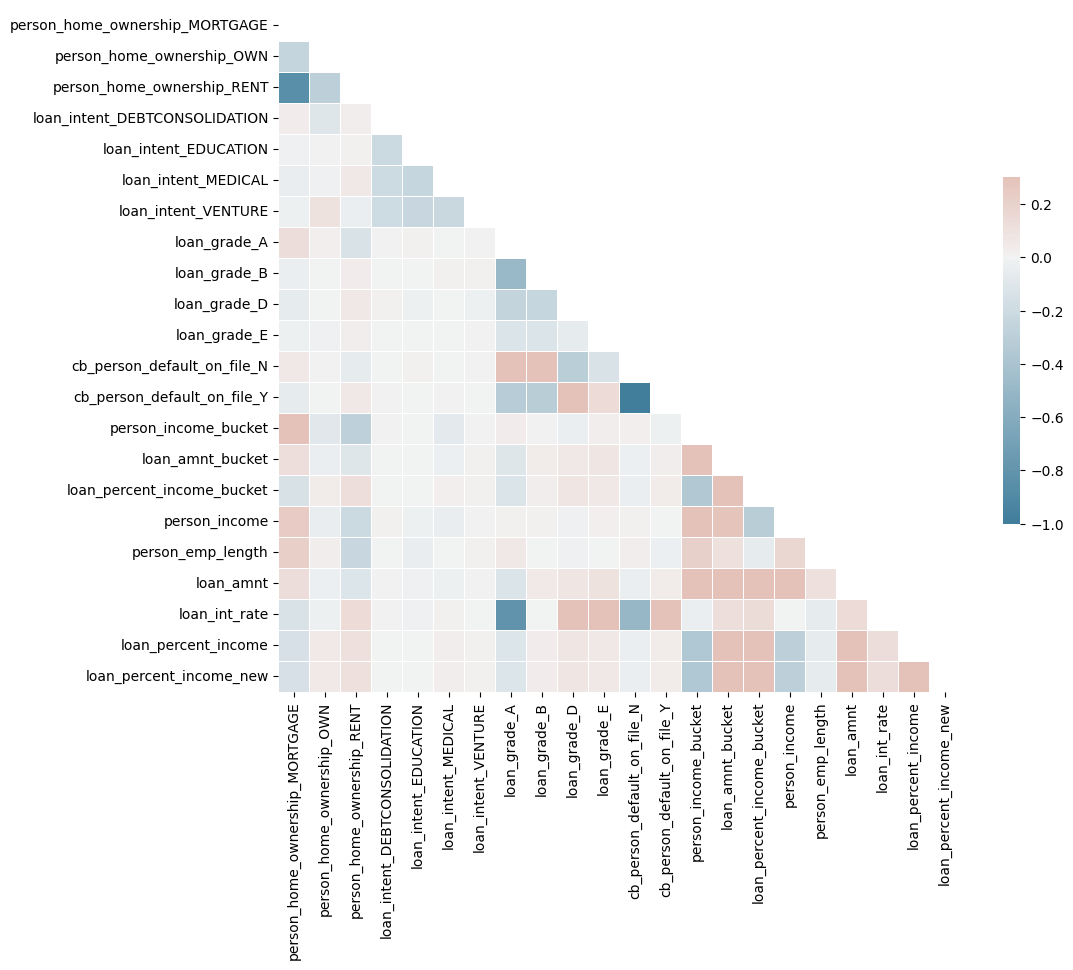

In [251]:
#Now we have removed some risk drivers based on relationship with target variable, lets look at correlation. 
#We want to remove highly correlated variables as they may not add value to the model

# Compute the correlation matrix
corr = train[riskdriver_cat_columns+riskdriver_num_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [252]:
##We see some correlation between variables.
#We want to remove correlated pairs with correlation > 0.5, whilst keeping the one with the highest Gini coefficient. 
#We need gini coefficient, correlation matrix and the columns to remove

def remove_correlated_features(df, corr_matrix, gini_df, threshold=0.5):
    """
    Remove correlated features based on a correlation matrix and a threshold value. 
    If two features are correlated above the threshold, the one with the lower Gini coefficient is removed"
    """

    # Create a copy of the correlation matrix
    corr_matrix_copy = corr_matrix.copy()

    # Get the list of features to remove
    features_to_remove = []

    # Iterate through the columns of the correlation matrix
    for i, col in enumerate(corr_matrix.columns):
        for j in range(i+1, len(corr_matrix.columns)):
            # Check if the correlation is above the threshold
            if abs(corr_matrix.iloc[i, j]) > threshold:
                # Get the feature names
                feature_i = corr_matrix.columns[i]
                feature_j = corr_matrix.columns[j]

                # Get the Gini coefficients for the features
                gini_i = gini_df[gini_df["Risk Driver"] == feature_i]["Gini Coefficient"].values[0]
                gini_j = gini_df[gini_df["Risk Driver"] == feature_j]["Gini Coefficient"].values[0]

                # Determine which feature to remove based on the Gini coefficient
                if gini_i > gini_j:
                    features_to_remove.append(feature_j)
                else:
                    features_to_remove.append(feature_i)

    return list(set(features_to_remove))

remove_list = remove_correlated_features(train, train[riskdriver_cat_columns+riskdriver_num_columns].corr(), bivariate_gini, threshold=0.5)


riskdriver_cat_columns = [c for c in riskdriver_cat_columns if c not in remove_list]
riskdriver_num_columns = [c for c in riskdriver_num_columns if c not in remove_list]

#We now have a set of uncorrelated risk drivers to further consider for model selection. 
#NOTE, the above method is not completely optimal. An optimal approach would be to recompute the correlation matrix after each removal, 
#as drivers can be correlated with multiple variables and in the end, effect which ones we consider further. 

### Multivariate selection

In [257]:
##I am going to use forward selection to select the best model. The forward selection will be based on the Gini added to the final model.
##An alternative could be to use the p-value or stepwise selection.

def gini_from_auc(auc):
    return 2 * auc - 1

def calculate_gini(df, features, target):
    model = LogisticRegression(solver='liblinear')
    model.fit(df[features], df[target])
    preds = model.predict_proba(df[features])[:, 1]
    auc = roc_auc_score(df[target], preds)
    return gini_from_auc(auc)

def forward_selection_gini(df, risk_drivers, target, threshold=0.01):
    selected_drivers = []
    remaining_drivers = risk_drivers.copy()
    step = 1
    
    # Step 1: Find the single best risk driver (highest Gini)
    best_gini = -1
    best_driver = None
    gini_results = {}
    
    for driver in remaining_drivers:
        gini = calculate_gini(df, [driver], target)
        gini_results[driver] = gini
        if gini > best_gini:
            best_gini = gini
            best_driver = driver
    
    if best_driver is None:
        print("No valid risk driver found.")
        return []
    
    selected_drivers.append(best_driver)
    remaining_drivers.remove(best_driver)
    print(f"Step {step}: Adding '{best_driver}' with Gini = {best_gini:.4f}")
    
    # Step 2: Iteratively add risk drivers
    current_gini = best_gini
    while remaining_drivers:
        best_additional_gini = 0
        best_new_driver = None
        
        for driver in remaining_drivers:
            new_gini = calculate_gini(df, selected_drivers + [driver], target)
            additional_gini = new_gini - current_gini
            
            print(f"\tTesting '{driver}' -> Additional Gini: {additional_gini:.4f}")
            
            if additional_gini > best_additional_gini:
                best_additional_gini = additional_gini
                best_new_driver = driver
        
        # Stop if no driver improves Gini above threshold
        if best_additional_gini < threshold:
            print(f"Stopping: No remaining driver adds more than {threshold:.4f} Gini.")
            break
        
        # Add the best new driver
        selected_drivers.append(best_new_driver)
        remaining_drivers.remove(best_new_driver)
        current_gini += best_additional_gini
        step += 1
        print(f"Step {step}: Adding '{best_new_driver}' -> Total Gini = {current_gini:.4f}")
    
    return selected_drivers

forward_selection_gini(train, riskdriver_num_columns + riskdriver_cat_columns, target_column[0], threshold=0.01)

Step 1: Adding 'loan_percent_income_new' with Gini = 0.4515
	Testing 'person_income' -> Additional Gini: -0.0705
	Testing 'person_emp_length' -> Additional Gini: 0.0130
	Testing 'loan_int_rate' -> Additional Gini: 0.1867
	Testing 'person_home_ownership_OWN' -> Additional Gini: 0.0273
	Testing 'person_home_ownership_RENT' -> Additional Gini: 0.0637
	Testing 'loan_intent_DEBTCONSOLIDATION' -> Additional Gini: 0.0135
	Testing 'loan_intent_EDUCATION' -> Additional Gini: 0.0105
	Testing 'loan_intent_MEDICAL' -> Additional Gini: 0.0058
	Testing 'loan_intent_VENTURE' -> Additional Gini: 0.0208
	Testing 'loan_grade_B' -> Additional Gini: 0.0347
	Testing 'loan_grade_D' -> Additional Gini: 0.1421
	Testing 'loan_grade_E' -> Additional Gini: 0.0379
Step 2: Adding 'loan_int_rate' -> Total Gini = 0.6381
	Testing 'person_income' -> Additional Gini: -0.2617
	Testing 'person_emp_length' -> Additional Gini: 0.0033
	Testing 'person_home_ownership_OWN' -> Additional Gini: 0.0187
	Testing 'person_home_owne

['loan_percent_income_new',
 'loan_int_rate',
 'person_home_ownership_RENT',
 'loan_grade_D']